<a href="https://colab.research.google.com/github/SAISKAND/Python-projects/blob/main/Baby_cry_detection/ML_baby_cry_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#  **Feature Engineering**

In [ ]:
#data_path='/content/drive/MyDrive/Baby cry detection/baby_data/data'
laugh_path = '/content/drive/MyDrive/Baby cry detection/baby_data/data/laugh'
cry_path = '/content/drive/MyDrive/Baby cry detection/baby_data/data/cry'
silent_path = '/content/drive/MyDrive/Baby cry detection/baby_data/data/silence'
noise_path = '/content/drive/MyDrive/Baby cry detection/baby_data/data/noise'

In [ ]:
audio_path='/content/drive/MyDrive/Baby cry detection/baby_data/data/cry/1-211527-A.ogg'
y, sr = librosa.load(audio_path)
print(y.shape,sr)
ipd.Audio(audio_path)

(110272,) 22050


In [ ]:
#FINAL
import numpy as np
import librosa
from scipy.stats import skew, kurtosis

def extract_features(audio_path):
    y, sr = librosa.load(audio_path)
    sr_f = 44100

    # MFCC and its deltas
    mfcc = librosa.feature.mfcc(y=y, sr=sr_f, n_mfcc=13)
    mfcc_delta = librosa.feature.delta(mfcc)
    mfcc_delta2 = librosa.feature.delta(mfcc, order=2)

    # Mean and Standard Deviation of MFCC, Delta, and Delta-Delta
    mfcc_mean = np.mean(mfcc, axis=1)
    mfcc_std = np.std(mfcc, axis=1)
    mfcc_delta_mean = np.mean(mfcc_delta, axis=1)
    mfcc_delta_std = np.std(mfcc_delta, axis=1)
    mfcc_delta2_mean = np.mean(mfcc_delta2, axis=1)
    mfcc_delta2_std = np.std(mfcc_delta2, axis=1)

    # Additional statistics: Median, Skewness, Kurtosis
    mfcc_median = np.median(mfcc, axis=1)
    mfcc_skew = skew(mfcc, axis=1)
    mfcc_kurtosis = kurtosis(mfcc, axis=1)

    mfcc_delta_median = np.median(mfcc_delta, axis=1)
    mfcc_delta_skew = skew(mfcc_delta, axis=1)
    mfcc_delta_kurtosis = kurtosis(mfcc_delta, axis=1)

    mfcc_delta2_median = np.median(mfcc_delta2, axis=1)
    mfcc_delta2_skew = skew(mfcc_delta2, axis=1)
    mfcc_delta2_kurtosis = kurtosis(mfcc_delta2, axis=1)
    spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr_f))
    features = np.hstack((
        mfcc_mean, mfcc_std, mfcc_median, mfcc_skew, mfcc_kurtosis,
        mfcc_delta_mean, mfcc_delta_std, mfcc_delta_median, mfcc_delta_skew, mfcc_delta_kurtosis,
        mfcc_delta2_mean, mfcc_delta2_std, mfcc_delta2_median, mfcc_delta2_skew, mfcc_delta2_kurtosis,spectral_rolloff
    ))

    return features


In [ ]:
import os
import pandas as pd

features = []

# Function to handle different file extensions
def process_audio_files(path, label):
    for file_name in os.listdir(path):
        audio_path = os.path.join(path, file_name)
        if audio_path.endswith(('.wav', '.ogg', '.m4a')):
            features.append([label] + list(extract_features(audio_path)))

# Process each category of audio files
process_audio_files(laugh_path, 'laugh')
process_audio_files(cry_path, 'cry')
process_audio_files(noise_path, 'noise')
process_audio_files(silent_path, 'silent')

# Create DataFrame from features
df = pd.DataFrame(features, columns=[
    'label',
    'mfcc_mean_1', 'mfcc_mean_2', 'mfcc_mean_3', 'mfcc_mean_4', 'mfcc_mean_5', 'mfcc_mean_6', 'mfcc_mean_7', 'mfcc_mean_8', 'mfcc_mean_9', 'mfcc_mean_10', 'mfcc_mean_11', 'mfcc_mean_12', 'mfcc_mean_13',
    'mfcc_std_1', 'mfcc_std_2', 'mfcc_std_3', 'mfcc_std_4', 'mfcc_std_5', 'mfcc_std_6', 'mfcc_std_7', 'mfcc_std_8', 'mfcc_std_9', 'mfcc_std_10', 'mfcc_std_11', 'mfcc_std_12', 'mfcc_std_13',
    'mfcc_median_1', 'mfcc_median_2', 'mfcc_median_3', 'mfcc_median_4', 'mfcc_median_5', 'mfcc_median_6', 'mfcc_median_7', 'mfcc_median_8', 'mfcc_median_9', 'mfcc_median_10', 'mfcc_median_11', 'mfcc_median_12', 'mfcc_median_13',
    'mfcc_skew_1', 'mfcc_skew_2', 'mfcc_skew_3', 'mfcc_skew_4', 'mfcc_skew_5', 'mfcc_skew_6', 'mfcc_skew_7', 'mfcc_skew_8', 'mfcc_skew_9', 'mfcc_skew_10', 'mfcc_skew_11', 'mfcc_skew_12', 'mfcc_skew_13',
    'mfcc_kurtosis_1', 'mfcc_kurtosis_2', 'mfcc_kurtosis_3', 'mfcc_kurtosis_4', 'mfcc_kurtosis_5', 'mfcc_kurtosis_6', 'mfcc_kurtosis_7', 'mfcc_kurtosis_8', 'mfcc_kurtosis_9', 'mfcc_kurtosis_10', 'mfcc_kurtosis_11', 'mfcc_kurtosis_12', 'mfcc_kurtosis_13',
    'mfcc_delta_mean_1', 'mfcc_delta_mean_2', 'mfcc_delta_mean_3', 'mfcc_delta_mean_4', 'mfcc_delta_mean_5', 'mfcc_delta_mean_6', 'mfcc_delta_mean_7', 'mfcc_delta_mean_8', 'mfcc_delta_mean_9', 'mfcc_delta_mean_10', 'mfcc_delta_mean_11', 'mfcc_delta_mean_12', 'mfcc_delta_mean_13',
    'mfcc_delta_std_1', 'mfcc_delta_std_2', 'mfcc_delta_std_3', 'mfcc_delta_std_4', 'mfcc_delta_std_5', 'mfcc_delta_std_6', 'mfcc_delta_std_7', 'mfcc_delta_std_8', 'mfcc_delta_std_9', 'mfcc_delta_std_10', 'mfcc_delta_std_11', 'mfcc_delta_std_12', 'mfcc_delta_std_13',
    'mfcc_delta_median_1', 'mfcc_delta_median_2', 'mfcc_delta_median_3', 'mfcc_delta_median_4', 'mfcc_delta_median_5', 'mfcc_delta_median_6', 'mfcc_delta_median_7', 'mfcc_delta_median_8', 'mfcc_delta_median_9', 'mfcc_delta_median_10', 'mfcc_delta_median_11', 'mfcc_delta_median_12', 'mfcc_delta_median_13',
    'mfcc_delta_skew_1', 'mfcc_delta_skew_2', 'mfcc_delta_skew_3', 'mfcc_delta_skew_4', 'mfcc_delta_skew_5', 'mfcc_delta_skew_6', 'mfcc_delta_skew_7', 'mfcc_delta_skew_8', 'mfcc_delta_skew_9', 'mfcc_delta_skew_10', 'mfcc_delta_skew_11', 'mfcc_delta_skew_12', 'mfcc_delta_skew_13',
    'mfcc_delta_kurtosis_1', 'mfcc_delta_kurtosis_2', 'mfcc_delta_kurtosis_3', 'mfcc_delta_kurtosis_4', 'mfcc_delta_kurtosis_5', 'mfcc_delta_kurtosis_6', 'mfcc_delta_kurtosis_7', 'mfcc_delta_kurtosis_8', 'mfcc_delta_kurtosis_9', 'mfcc_delta_kurtosis_10', 'mfcc_delta_kurtosis_11', 'mfcc_delta_kurtosis_12', 'mfcc_delta_kurtosis_13',
    'mfcc_delta2_mean_1', 'mfcc_delta2_mean_2', 'mfcc_delta2_mean_3', 'mfcc_delta2_mean_4', 'mfcc_delta2_mean_5', 'mfcc_delta2_mean_6', 'mfcc_delta2_mean_7', 'mfcc_delta2_mean_8', 'mfcc_delta2_mean_9', 'mfcc_delta2_mean_10', 'mfcc_delta2_mean_11', 'mfcc_delta2_mean_12', 'mfcc_delta2_mean_13',
    'mfcc_delta2_std_1', 'mfcc_delta2_std_2', 'mfcc_delta2_std_3', 'mfcc_delta2_std_4', 'mfcc_delta2_std_5', 'mfcc_delta2_std_6', 'mfcc_delta2_std_7', 'mfcc_delta2_std_8', 'mfcc_delta2_std_9', 'mfcc_delta2_std_10', 'mfcc_delta2_std_11', 'mfcc_delta2_std_12', 'mfcc_delta2_std_13',
    'mfcc_delta2_median_1', 'mfcc_delta2_median_2', 'mfcc_delta2_median_3', 'mfcc_delta2_median_4', 'mfcc_delta2_median_5', 'mfcc_delta2_median_6', 'mfcc_delta2_median_7', 'mfcc_delta2_median_8', 'mfcc_delta2_median_9', 'mfcc_delta2_median_10', 'mfcc_delta2_median_11', 'mfcc_delta2_median_12', 'mfcc_delta2_median_13',
    'mfcc_delta2_skew_1', 'mfcc_delta2_skew_2', 'mfcc_delta2_skew_3', 'mfcc_delta2_skew_4', 'mfcc_delta2_skew_5', 'mfcc_delta2_skew_6', 'mfcc_delta2_skew_7', 'mfcc_delta2_skew_8', 'mfcc_delta2_skew_9', 'mfcc_delta2_skew_10', 'mfcc_delta2_skew_11', 'mfcc_delta2_skew_12', 'mfcc_delta2_skew_13',
    'mfcc_delta2_kurtosis_1', 'mfcc_delta2_kurtosis_2', 'mfcc_delta2_kurtosis_3', 'mfcc_delta2_kurtosis_4', 'mfcc_delta2_kurtosis_5', 'mfcc_delta2_kurtosis_6', 'mfcc_delta2_kurtosis_7', 'mfcc_delta2_kurtosis_8', 'mfcc_delta2_kurtosis_9', 'mfcc_delta2_kurtosis_10', 'mfcc_delta2_kurtosis_11', 'mfcc_delta2_kurtosis_12', 'mfcc_delta2_kurtosis_13','spectral_rolloff'
])

# Save DataFrame to CSV
df.to_csv('/content/drive/MyDrive/Baby cry detection/baby_audfeatures.csv',index=False)


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Baby cry detection/baby_audfeatures.csv')

In [ ]:
df
#df.to_csv('/content/drive/MyDrive/Baby cry detection/baby_mainfeatures.csv', index=False)

,label,mfcc_mean_1,mfcc_mean_2,mfcc_mean_3,mfcc_mean_4,mfcc_mean_5,mfcc_mean_6,mfcc_mean_7,mfcc_mean_8,mfcc_mean_9,...,mfcc_delta2_kurtosis_5,mfcc_delta2_kurtosis_6,mfcc_delta2_kurtosis_7,mfcc_delta2_kurtosis_8,mfcc_delta2_kurtosis_9,mfcc_delta2_kurtosis_10,mfcc_delta2_kurtosis_11,mfcc_delta2_kurtosis_12,mfcc_delta2_kurtosis_13,spectral_rolloff
0,laugh,-282.721863,112.952705,-36.068512,-16.503012,-23.649851,-2.914685,-17.782732,-20.606068,-21.805107,...,1.249111,1.332031,0.491157,1.438282,1.419974,1.535933,0.790179,0.772478,1.559185,7190.096029
1,laugh,-308.007080,111.720718,-22.273994,-17.636791,-17.325403,-0.532206,-20.543180,-17.957163,-20.635782,...,4.642713,5.578643,1.869169,7.048764,3.993954,5.425600,6.677056,5.703524,3.067826,8475.608317
2,laugh,-292.542450,109.636360,-31.654003,-12.086900,-19.638815,-5.693473,-20.528624,-18.301987,-19.464123,...,1.314486,2.198194,-0.098728,3.968034,0.641194,2.117751,0.995537,1.590074,2.680337,7545.593262
3,laugh,-286.228943,110.472130,-35.454044,-13.349507,-22.107214,-4.659352,-19.920204,-19.524595,-19.379900,...,0.643942,1.082754,1.369233,3.372863,1.917330,2.216276,1.010350,0.826063,1.654768,7236.153158
4,laugh,-309.556122,114.970123,-21.530098,-17.163157,-16.410475,-1.485943,-20.867577,-18.361338,-19.491213,...,5.431728,4.653469,1.837151,6.819828,4.200209,6.266187,7.660709,5.439506,2.882765,8080.334473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,silent,-298.458374,123.880333,40.030697,27.085205,25.164289,23.086977,18.586151,17.879286,12.958720,...,-0.294378,-0.163365,0.806316,0.018065,-0.225895,-0.402904,0.912670,0.042605,-0.359523,1894.921875
428,silent,-303.146027,121.818489,42.136818,27.702005,25.444151,22.990086,18.038986,18.319496,13.811501,...,-0.592699,-0.187838,0.199887,0.146999,-0.409285,-0.168543,-0.255811,0.354547,-0.346833,1984.145101
429,silent,-224.434753,125.259064,39.095982,24.745264,24.304796,23.396864,16.581924,17.145908,12.378632,...,-0.376091,-0.368714,1.365220,0.108786,-0.171031,-0.237542,-0.216433,-0.337028,0.847717,2192.399089
430,silent,-228.400467,122.709908,41.382359,26.744137,23.910055,23.050428,16.831789,17.460211,12.747331,...,-0.555649,-0.245147,-0.381524,0.055202,-0.041341,-0.333246,-0.641365,0.120391,0.577420,2303.454590


# **Feature Selection**

Fisher Score computation

               Feature  Fisher Score
4          mfcc_mean_5    389.651794
30       mfcc_median_5    359.924268
32       mfcc_median_7    296.589477
90   mfcc_delta_std_13    287.757002
6          mfcc_mean_7    283.297245
195   spectral_rolloff    271.444284
89   mfcc_delta_std_12    238.080615
88   mfcc_delta_std_11    227.879012
87   mfcc_delta_std_10    221.609229
24         mfcc_std_12    221.402539


<ipython-input-13-b583ba8152f9>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Fisher Score', y='Feature', data=top_features, palette='viridis')


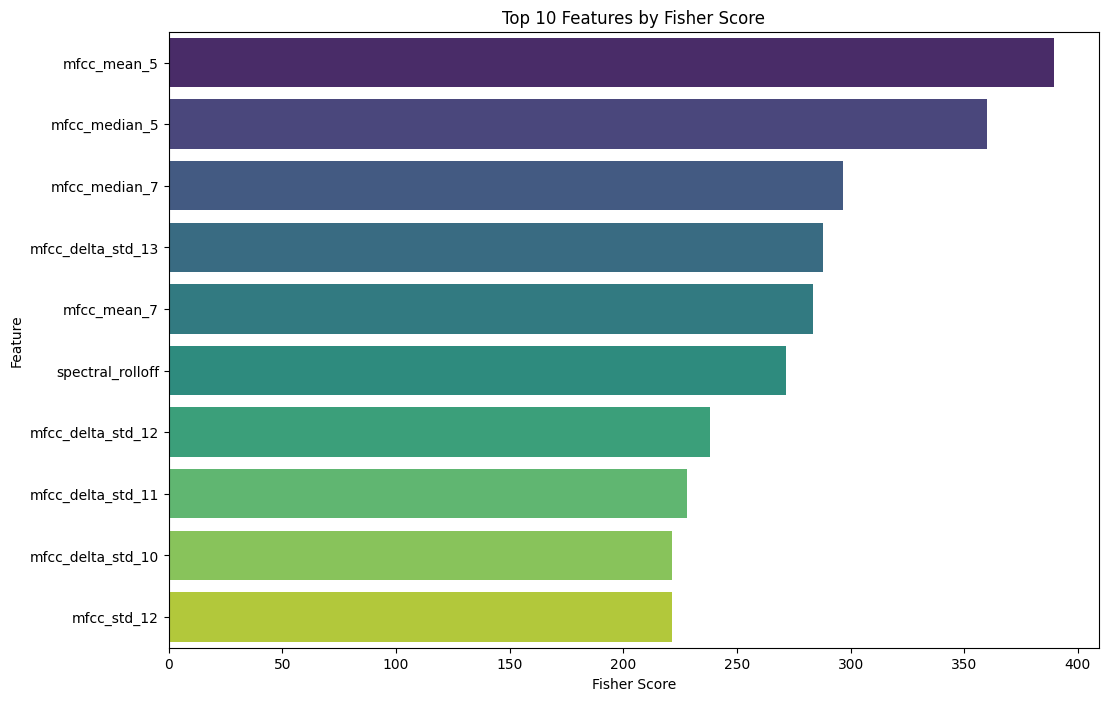

In [ ]:
from sklearn.feature_selection import f_classif

# Separate features and labels
X = df.drop(columns=['label'])
y = df['label']

# Encode labels to numeric values
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
y_encoded = l.fit_transform(y)

# Compute Fisher's score (ANOVA F-value) for each feature
fisher_scores, p_values = f_classif(X, y_encoded)

# Create a DataFrame to display the scores and corresponding feature names
fisher_score_df = pd.DataFrame({'Feature': X.columns, 'Fisher Score': fisher_scores})
fisher_score_df = fisher_score_df.sort_values(by='Fisher Score', ascending=False)

# Display the top features
top_features = fisher_score_df.head(10)  # Select top 10 features
print(top_features)

# Plot the Fisher scores
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x='Fisher Score', y='Feature', data=top_features, palette='viridis')
plt.title('Top 10 Features by Fisher Score')
plt.show()


# **Random Forest**

**Training**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

X = df.drop(columns=['label'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
# Define the model
model = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=2,
                                       n_estimators=200, oob_score=True)
model.fit(X_train, y_train)

# RFE to select the best features
#selector = RFE(model, n_features_to_select=10)
#selector = selector.fit(X_train, y_train)

# Get the ranking of features
#feature_ranking = selector.ranking_
#print(feature_ranking)
# Select the features
#selected_features = X_train.columns[selector.support_]
#X_train_selected = selector.transform(X_train)
#X_test_selected = selector.transform(X_test)


RandomForestClassifier(max_depth=2, n_estimators=200, n_jobs=-1, oob_score=True,
                       random_state=42)

In [ ]:
model.oob_score_

0.8703703703703703

**Hyperparameter Tuning**

In [ ]:
model = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=model,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.best_score_

0.9490740740740741

In [ ]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=42)

**Decision Tree**

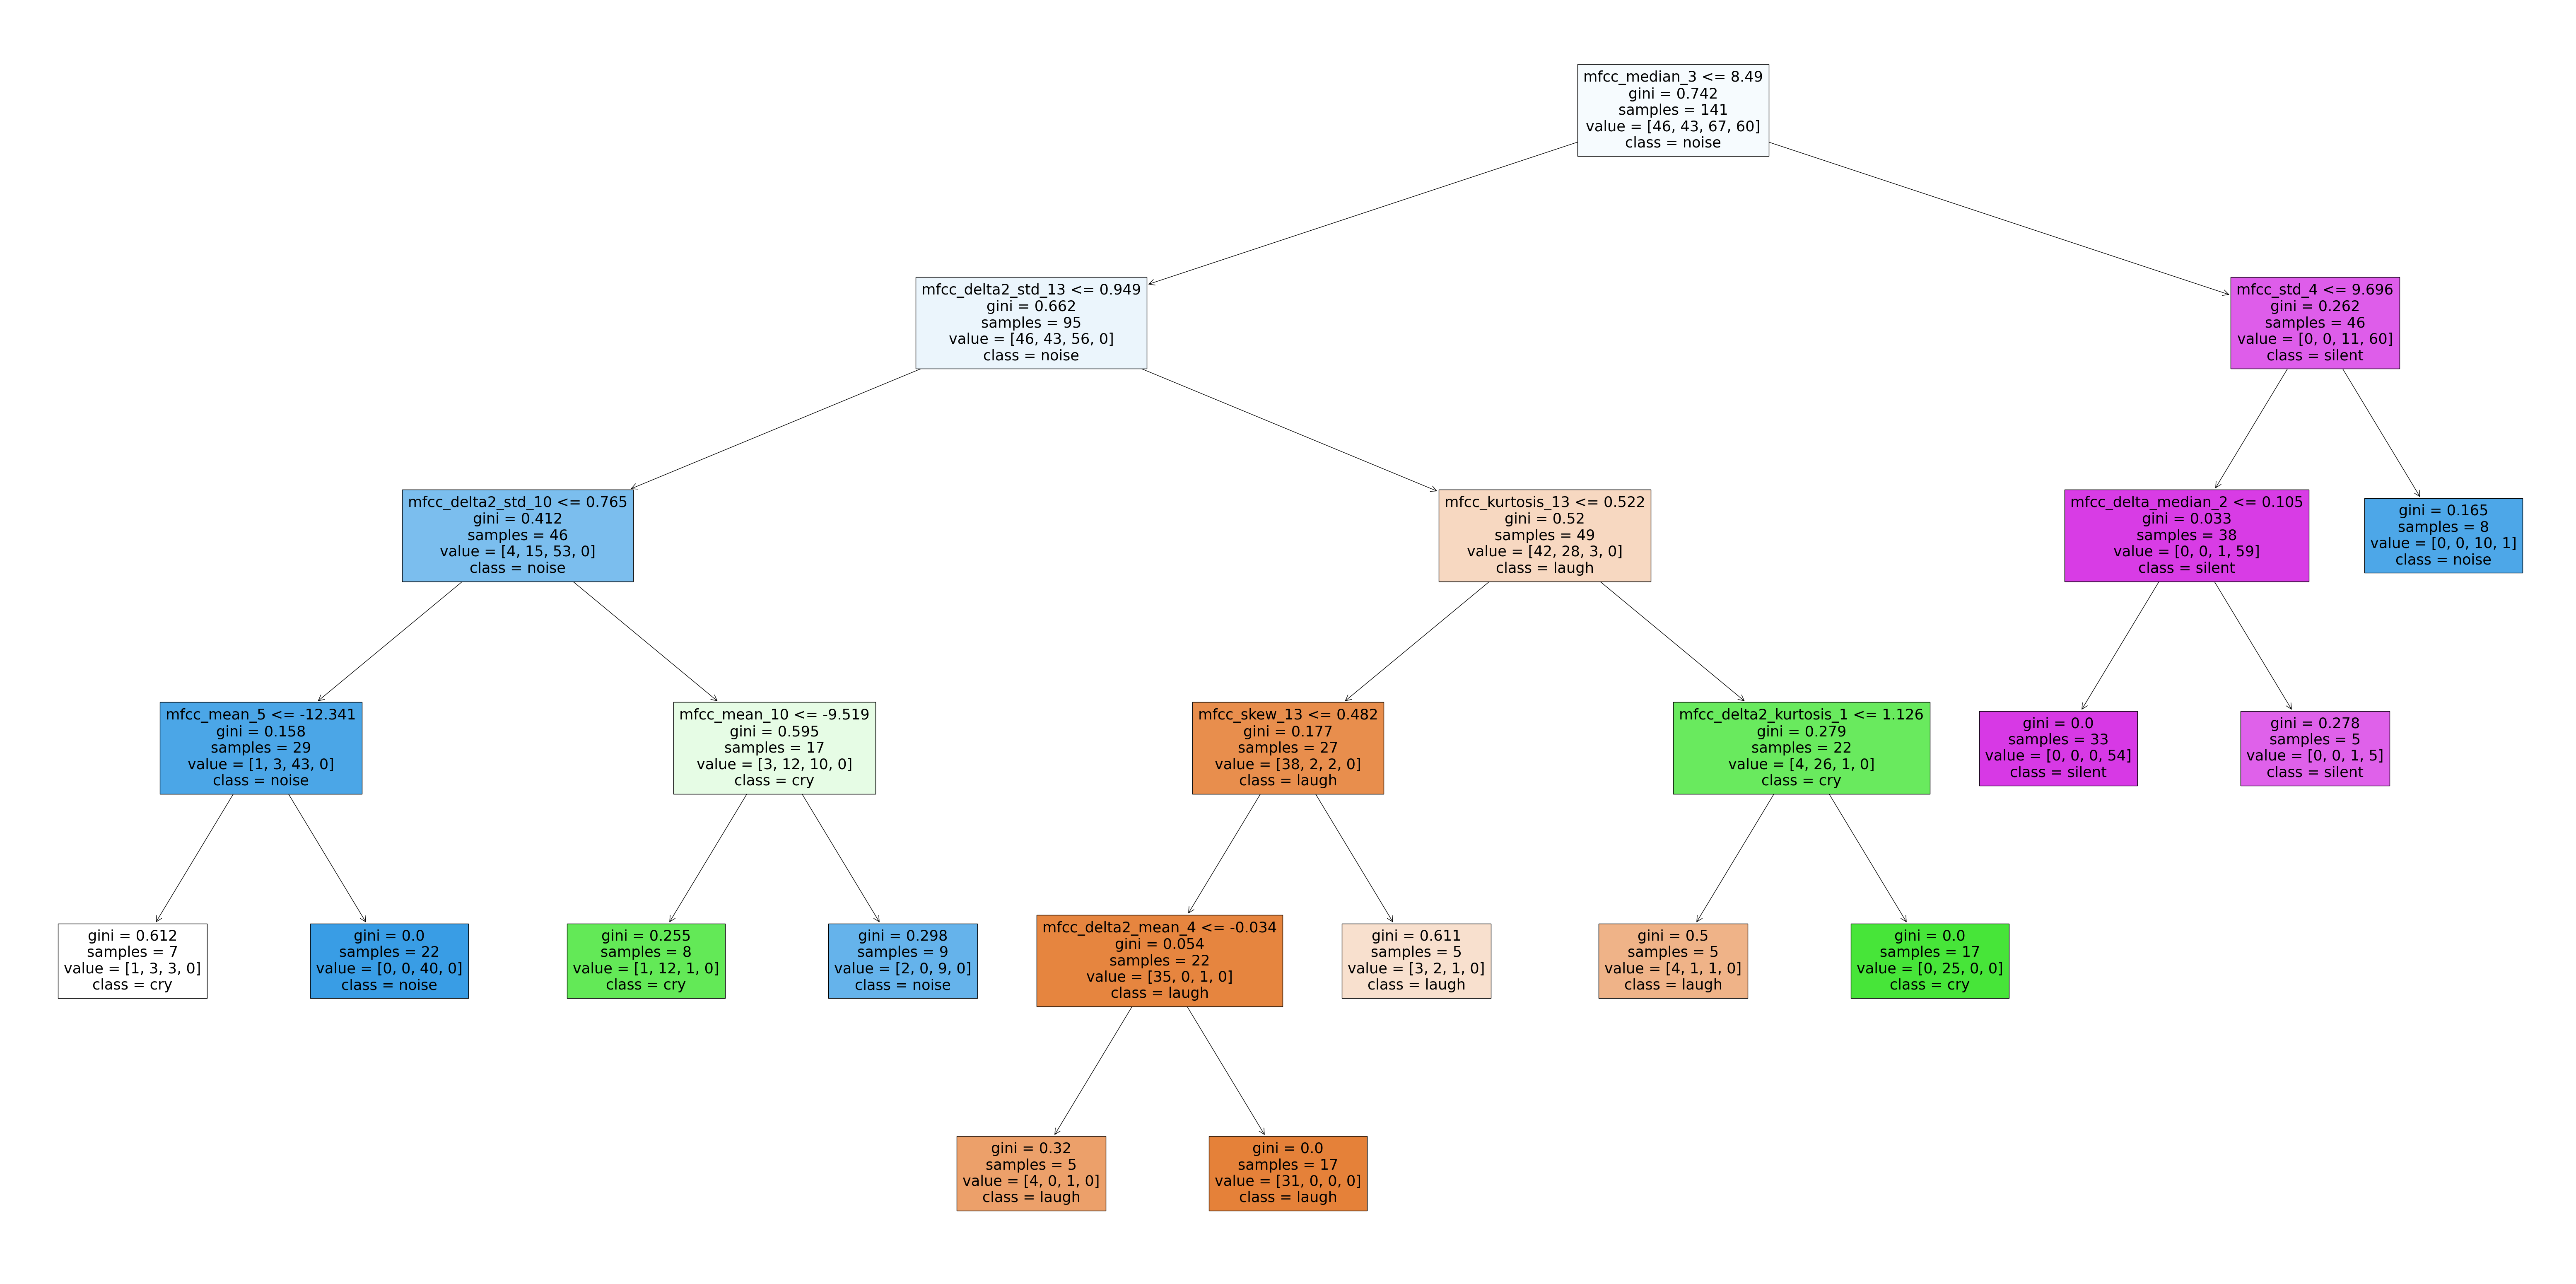

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[7], feature_names = X.columns,class_names=['laugh', "cry",'noise','silent'],filled=True);

In [ ]:
model.fit(X_train, y_train)
model.feature_importances_

array([4.23306309e-03, 9.88055804e-03, 1.83437507e-02, 1.01010752e-02,
       5.54457326e-02, 1.58780085e-02, 2.71995664e-02, 1.71143582e-02,
       3.37521354e-02, 1.59374564e-02, 1.30831374e-02, 1.03161657e-02,
       5.79874229e-03, 2.97831985e-03, 5.94025549e-03, 1.20527557e-03,
       3.29028701e-03, 3.90069161e-03, 6.70070410e-03, 1.05233054e-02,
       9.25010360e-04, 5.70614395e-03, 1.36173199e-02, 9.29043686e-03,
       2.15895249e-02, 4.12122999e-03, 5.90607395e-03, 3.54546545e-03,
       2.25111334e-02, 1.27149277e-02, 3.25195298e-02, 7.71516959e-03,
       2.68470683e-02, 1.07268696e-02, 2.05135379e-02, 2.68748431e-02,
       1.51249643e-02, 1.61966557e-02, 1.45081295e-02, 1.52189546e-02,
       3.85081833e-03, 3.45102594e-03, 5.71731539e-03, 9.35926674e-03,
       7.13481220e-04, 1.12619394e-03, 3.17040769e-03, 8.23610158e-05,
       1.30694158e-03, 2.78322406e-03, 3.80847393e-04, 1.81268083e-02,
       1.65692093e-03, 5.55445266e-03, 2.00699030e-03, 2.45789204e-03,
      

In [ ]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": model.feature_importances_
})

imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
4,mfcc_mean_5,0.055446
8,mfcc_mean_9,0.033752
30,mfcc_median_5,0.032520
6,mfcc_mean_7,0.027200
35,mfcc_median_10,0.026875
...,...,...
73,mfcc_delta_mean_9,0.000083
47,mfcc_skew_9,0.000082
92,mfcc_delta_median_2,0.000062
188,mfcc_delta2_kurtosis_7,0.000059


**Testing Accuracy**

In [ ]:
y_pred = model.predict(X_test)

# metrics are used to find accuracy or error
from sklearn import metrics
print()

# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL:", metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))


ACCURACY OF THE MODEL: 0.9675925925925926
              precision    recall  f1-score   support

         cry       0.93      0.97      0.95        58
       laugh       0.98      0.98      0.98        60
       noise       0.95      0.91      0.93        45
      silent       1.00      1.00      1.00        53

    accuracy                           0.97       216
   macro avg       0.97      0.96      0.97       216
weighted avg       0.97      0.97      0.97       216



**Prediction**

In [ ]:
audio_path1='/content/drive/MyDrive/Baby cry detection/Baby-Crying-Hard-1-www.fesliyanstudios.com.wav'
audio_path2='/content/drive/MyDrive/Baby cry detection/Baby-Crying-Hard-2-www.fesliyanstudios.com.wav'
audio_path3='/content/drive/MyDrive/Baby cry detection/Baby-Hard-Laughing-www.fesliyanstudios.com.wav'
audio_path4='/content/drive/MyDrive/Baby cry detection/baby-laughter2-15231.wav'

In [ ]:
audio_features1=extract_features(audio_path2)
#print(audio_features1)
model.predict([audio_features1])
#model.predict([[-264.4808655, 118.950882, -8.849890709, 2.20020318, -22.57223892, -5.705801964, -6.383895397, -4.147284508, -5.977258682, -11.55819035, -13.93425179, -10.19073391, -7.897975922, 83.4382782, 19.42854881, 21.32018852, 10.51275253, 16.80939674, 15.84236908, 12.76773739, 11.55083179, 7.713891506, 7.711714268, 9.532284737, 7.520673275, 7.608662128, -293.1045532, 122.0865173, -2.396020889, 1.517271161, -16.66123962, -0.763335109, -3.609625816, -0.896247387, -6.307481766, -11.94935989, -13.2355938, -9.629257202, -8.410036087, 0.840847254, -0.578470111, -1.105448365, 0.02563091, -0.90889591, -0.535918117, -0.184433311, -1.141599655, 0.310379356, -0.100021765, -0.097739846, 0.031276528, 0.342835367, -0.153891087, 0.405124426, 0.946691275, -0.229967833, 0.413926125, -0.747373581, 0.853715658, 0.689925671, -0.498856306, 0.536439896, 0.377648592, 0.916710138, 0.313811064, -1.059689641, 0.042727239, 0.209431142, -0.112229779, 0.037778996, 0.080387436, 0.158536807, -0.017019136, -0.097074337, 0.092355266, 0.049059387, 0.054599956, -0.026978413, 13.16500473, 3.315007448, 3.46630621, 1.76705277, 2.588479519, 2.727993965, 2.108363628, 1.636167288, 1.321012616, 1.264095426, 1.618146181, 1.458672881, 1.180648327, -0.975329638, 0.03287131, 0.679698348, 0.006169666, 0.075893179, 0.033975955, 0.257246375, 0.044151507, -0.316528738, -0.001326754, -0.0107258, 0.127792209, 0.049306415, -0.187095881, -0.591029763, -0.420778275, -0.356808007, -0.577650189, 0.119481787, -0.272914588, -0.302942306, 0.688255548, 0.279425591, 0.200720802, -0.026322033, 0.261272281, -0.070123434, 1.850878239, 0.452091455, 0.530736685, 2.206288815, -0.217793941, 0.553240299, 1.007001877, 0.212643147, -0.453600645, -0.295098305, 0.612484455, 1.559423923, 0.180380359, -0.065037079, -0.061955214, -0.032158703, -0.012089334, 0.011582942, 0.013857598, 0.012424272, -0.022684015, 0.000223378, 0.022994766, 0.033749208, 0.008092503, 6.010259628, 1.98085928, 2.027278423, 1.06147182, 1.210842967, 1.301821828, 1.06215477, 1.132068753, 0.801353335, 0.670065761, 0.894703865, 0.89094305, 0.745731115, 0.691293418, 0.033612214, -0.175370038, -0.080413386, -0.118736088, -0.021839498, -0.013394879, 0.077295333, -0.006553972, 0.050365128, -0.00965151, 0.037854493, -0.049748451, -0.699792504, -0.06819386, 0.550478399, -0.229336902, 0.954080939, -0.072031841, 0.243176788, -0.014604527, 0.283524424, -0.519082427, -0.018102942, -0.405285001, -0.240729108, 1.498188496, 0.243798018, 0.74610424, -0.250121117, 5.705467224, -0.257975101, 0.803974628, 1.050699234, 0.766002893, 0.329972982, -0.032333851, 1.734414577, 3.109870434, 3608.556112]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['cry'], dtype=object)

In [ ]:
audio_features2=extract_features(audio_path4)
#print(audio_features1)
model.predict([audio_features2])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['cry'], dtype=object)

In [ ]:
model.predict([[-231.0497284, 90.0930481, -24.12482452, 11.18126202, -10.23827934, -6.056502342, -0.242317766, 18.16786385, -1.032102585, 1.352152824, 0.107207648, 3.116065502, -2.083996058, 43.02323914, 25.63733101, 11.05506611, 7.232654095, 7.884388447, 11.08603477, 7.96796751, 6.609133244, 7.249344826, 6.524930954, 8.281468391, 8.782849312, 10.8442688, -233.3501892, 99.80134583, -22.52162552, 11.04574203, -10.45837021, -3.622255325, 0.280054212, 18.46729851, -0.909039974, 2.409460068, 0.693648219, 2.564676523, -1.797458172, 0.548990309, -1.130012274, -0.77218014, 0.059417114, 0.188604906, -0.841974378, 0.111492157, 0.119814672, -0.204454809, -0.423970699, -0.281963199, 0.825972319, 0.100040801, -0.136718512, 0.012140036, 0.688481569, -0.046934128, -0.672457695, 0.191109419, -0.161572695, -0.088976622, -0.648984671, -0.542259693, -0.546627522, 0.879191875, -0.839602232, -0.473125964, 0.189479619, 0.124541253, -0.010601222, -0.081166267, 0.064737409, 0.09600763, -0.054415878, 0.081810378, 0.028282169, 0.055295285, -0.021892628, 0.006767264, 3.913234472, 2.125439167, 1.507537007, 0.894336402, 0.887915909, 1.219819069, 0.930561602, 0.99953562, 1.044035912, 1.00412178, 1.024344921, 1.033375978, 1.274833679, -0.530342579, 0.184716672, 0.068566069, -0.048572198, -0.059928447, 0.221463889, 0.023444064, -0.001531124, 0.129499242, 0.070658728, 0.058739845, 0.015425893, 0.030630659, 3.083893776, -2.332810402, -0.244024634, 0.777102709, -0.37301448, -1.412574887, 0.381716758, -0.062799163, -0.060302388, -0.098799244, -0.421618432, -0.195613503, -0.039880514, 13.60853004, 9.62816143, 1.958141804, 1.572465897, 1.790752888, 3.717573643, 0.155762672, 1.092171192, 0.084709406, 0.490914822, 1.607424259, 0.254916906, 1.059744835, 0.004888987, -0.027309289, -0.060053103, -0.011488869, 0.008917728, -0.009758501, 0.034056254, -0.0029016, 0.003765691, -0.012825287, 0.00831663, 0.001344025, 0.008064854, 1.382310152, 0.756558836, 0.835882783, 0.532065928, 0.513060629, 0.603105426, 0.586577117, 0.631291389, 0.643266201, 0.657713771, 0.519239664, 0.467914969, 0.550160468, -0.029419078, 0.017973846, -0.046916381, -0.007035095, -0.002456807, -0.058321562, 0.021576978, -0.051034264, -0.00157244, -0.038677529, 0.00130803, -0.017616902, -0.031022577, 0.499452502, -0.166988254, 0.384673238, 0.022895006, 0.378178507, -0.104929969, 0.217996955, -0.363937616, -0.157142386, 0.113562867, 0.200484693, -0.139150113, 0.562194347, 7.058067322, 2.424776554, 1.02862978, -0.158731699, 1.726233006, 0.697419643, 1.486476421, 2.70213747, 0.000407696, 0.878070831, 1.310241222, -0.217818975, 1.740831852, 3741.942342]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['noise'], dtype=object)

In [ ]:
model.predict([[-289.20047, 99.03730774, 41.57831573, 24.34267998, 18.94988632, 22.55838776, 17.46899223, 19.17961502, 13.65538406, 11.55647755, 7.133832455, 11.77473068, 11.2772131, 11.28787518, 6.590076447, 4.444114208, 4.400548935, 3.702764988, 3.914305925, 3.186508417, 3.385649204, 3.494268656, 3.374066353, 3.102994442, 3.148345232, 3.610833168, -289.8564453, 99.57609558, 41.80241394, 24.29959106, 18.94361687, 22.49510384, 17.54037094, 19.42281342, 13.9075985, 11.72944164, 7.227180004, 11.80235672, 11.44177246, 3.547861576, -0.143956006, -0.504033864, 0.488120854, -0.192687169, 0.079191692, -0.194475576, -0.229832903, -0.345944107, -0.109918743, -0.140719429, 0.029302631, -0.041111249, 23.07936859, 0.046463966, 0.502187014, 0.328687906, 0.625005484, -0.119107962, -0.198513269, 0.356947422, 0.444023609, 0.902868509, 0.099709511, -0.264364004, -0.196911097, -0.075801477, -0.029139698, 0.006109315, -0.028533315, -0.027852222, 0.003837128, -0.017688658, -0.005400931, -0.004534203, -0.000978815, -0.009336712, -0.029433541, -0.022507103, 1.727007627, 0.84415096, 0.744563878, 0.77523005, 0.55737704, 0.56452626, 0.509375572, 0.501659453, 0.621272564, 0.568382204, 0.526277006, 0.507214665, 0.532243371, 0.039820351, -0.053069051, -0.040488467, -0.106544569, -0.035544969, 0.037207939, 0.006327407, -0.055054229, -0.02449003, 0.027872693, -0.007031876, -0.040964402, 0.005187615, -0.658844233, -0.004754191, 0.496732026, 0.153242275, -0.008704863, -0.010638074, -0.180025026, 0.053022575, -0.093043938, 0.226342276, 0.282856464, 0.141868547, -0.190532893, 7.616319656, 0.341742754, 0.88086319, -0.132568598, -0.428640842, -0.136715412, 0.213817835, -0.326355219, 0.286488056, 1.460290909, -0.016827345, -0.085812569, -0.579503536, 0.267261088, 0.050413031, -0.070280552, 0.011974356, -0.013109201, -0.032762077, -0.02488438, -0.041942738, -0.005308291, 0.001129175, 0.027269136, 0.002883781, 0.001824462, 1.378109336, 0.729489028, 0.59259969, 0.571349919, 0.503792703, 0.418717355, 0.374919862, 0.447608024, 0.45905903, 0.441946507, 0.433187097, 0.419150025, 0.44645831, 0.090311319, 0.045742206, -0.003986255, 0.00744035, -0.014790782, -0.034799449, 0.006084965, -0.079217315, -0.04362094, 0.021742523, 0.044095796, -0.010063152, -0.026168108, 2.373826504, 0.001364421, -0.340776324, -0.107936755, -0.170284837, -0.024028389, -0.429193676, 0.060070708, 0.166176245, -0.142717108, -0.18381156, 0.017504852, -0.084614292, 6.972428322, 0.398146391, -0.073960781, -0.381733179, -0.3600986, -0.324921131, 0.054473639, -0.501880169, -0.472007275, -0.405900955, -0.391920567, -0.684981346, -0.276219845, 818.162028]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['silent'], dtype=object)

# K-Nearest Neighbours

**Training**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 2. Load and Split Data
#df = pd.read_csv('/content/drive/MyDrive/Baby cry detection/features_all.csv')
#X = df.drop(columns=['label'])# Features
##y = df['label']
#X=df[['mfcc_mean','spectral_rolloff']] # Target variable ,'mfcc_mean_11','mfcc_mean_12','mfcc_median_9','mfcc_median_11','mfcc_median_12'
##X=df[['mfcc_median_13','mfcc_mean_13','spectral_rolloff','mfcc_mean_7','mfcc_mean_9']]
##X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# 3. Preprocess Data (Standardization)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.75


**Optimum K value Prediction**

In [ ]:
k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

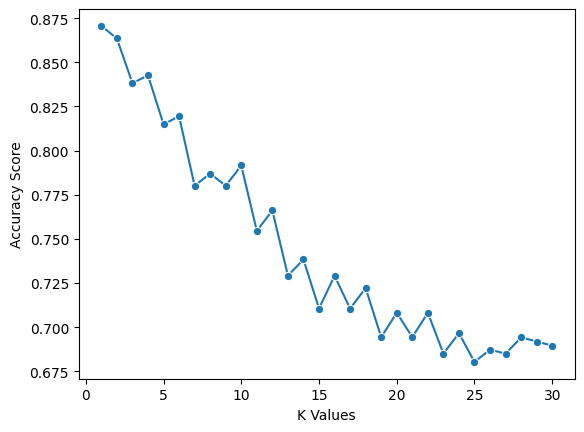

In [ ]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

**Testing and Accuracy**

In [ ]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[37  8 13  0]
 [ 6 47  7  0]
 [10 10 23  2]
 [ 0  0  0 53]]
              precision    recall  f1-score   support

         cry       0.70      0.64      0.67        58
       laugh       0.72      0.78      0.75        60
       noise       0.53      0.51      0.52        45
      silent       0.96      1.00      0.98        53

    accuracy                           0.74       216
   macro avg       0.73      0.73      0.73       216
weighted avg       0.74      0.74      0.74       216



# **Support Vector Machine**

**Training**

In [ ]:
from sklearn import svm
model1 = svm.SVC(kernel='sigmoid', C=0.3, gamma='scale')
model1.fit(X, y)

**Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Example for SVM
param_grid = {'C': [0.01 ,0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train_scaled, y_train)

# Print the best parameters found by GridSearch
print("Best parameters found: ", grid.best_params_)

**Testing and Accuracy**

In [ ]:
# Predict using the SVM model
predictions = model1.predict(X)

# Evaluate the predictions
accuracy = model1.score(X, y)
print("Accuracy of SVM:", accuracy)

Accuracy of SVM: 0.9074074074074074


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(predictions, y))
print(classification_report(predictions, y))

[[107  11  13   0]
 [  0  97  10   0]
 [  1   0  80   0]
 [  0   0   5 108]]
              precision    recall  f1-score   support

         cry       0.99      0.82      0.90       131
       laugh       0.90      0.91      0.90       107
       noise       0.74      0.99      0.85        81
      silent       1.00      0.96      0.98       113

    accuracy                           0.91       432
   macro avg       0.91      0.92      0.91       432
weighted avg       0.92      0.91      0.91       432



**Prediction**

In [ ]:
model1.predict([[-289.20047, 99.03730774, 41.57831573, 24.34267998, 18.94988632, 22.55838776, 17.46899223, 19.17961502, 13.65538406, 11.55647755, 7.133832455, 11.77473068, 11.2772131, 11.28787518, 6.590076447, 4.444114208, 4.400548935, 3.702764988, 3.914305925, 3.186508417, 3.385649204, 3.494268656, 3.374066353, 3.102994442, 3.148345232, 3.610833168, -289.8564453, 99.57609558, 41.80241394, 24.29959106, 18.94361687, 22.49510384, 17.54037094, 19.42281342, 13.9075985, 11.72944164, 7.227180004, 11.80235672, 11.44177246, 3.547861576, -0.143956006, -0.504033864, 0.488120854, -0.192687169, 0.079191692, -0.194475576, -0.229832903, -0.345944107, -0.109918743, -0.140719429, 0.029302631, -0.041111249, 23.07936859, 0.046463966, 0.502187014, 0.328687906, 0.625005484, -0.119107962, -0.198513269, 0.356947422, 0.444023609, 0.902868509, 0.099709511, -0.264364004, -0.196911097, -0.075801477, -0.029139698, 0.006109315, -0.028533315, -0.027852222, 0.003837128, -0.017688658, -0.005400931, -0.004534203, -0.000978815, -0.009336712, -0.029433541, -0.022507103, 1.727007627, 0.84415096, 0.744563878, 0.77523005, 0.55737704, 0.56452626, 0.509375572, 0.501659453, 0.621272564, 0.568382204, 0.526277006, 0.507214665, 0.532243371, 0.039820351, -0.053069051, -0.040488467, -0.106544569, -0.035544969, 0.037207939, 0.006327407, -0.055054229, -0.02449003, 0.027872693, -0.007031876, -0.040964402, 0.005187615, -0.658844233, -0.004754191, 0.496732026, 0.153242275, -0.008704863, -0.010638074, -0.180025026, 0.053022575, -0.093043938, 0.226342276, 0.282856464, 0.141868547, -0.190532893, 7.616319656, 0.341742754, 0.88086319, -0.132568598, -0.428640842, -0.136715412, 0.213817835, -0.326355219, 0.286488056, 1.460290909, -0.016827345, -0.085812569, -0.579503536, 0.267261088, 0.050413031, -0.070280552, 0.011974356, -0.013109201, -0.032762077, -0.02488438, -0.041942738, -0.005308291, 0.001129175, 0.027269136, 0.002883781, 0.001824462, 1.378109336, 0.729489028, 0.59259969, 0.571349919, 0.503792703, 0.418717355, 0.374919862, 0.447608024, 0.45905903, 0.441946507, 0.433187097, 0.419150025, 0.44645831, 0.090311319, 0.045742206, -0.003986255, 0.00744035, -0.014790782, -0.034799449, 0.006084965, -0.079217315, -0.04362094, 0.021742523, 0.044095796, -0.010063152, -0.026168108, 2.373826504, 0.001364421, -0.340776324, -0.107936755, -0.170284837, -0.024028389, -0.429193676, 0.060070708, 0.166176245, -0.142717108, -0.18381156, 0.017504852, -0.084614292, 6.972428322, 0.398146391, -0.073960781, -0.381733179, -0.3600986, -0.324921131, 0.054473639, -0.501880169, -0.472007275, -0.405900955, -0.391920567, -0.684981346, -0.276219845, 818.162028]])

array(['laugh'], dtype=object)

In [ ]:
audio_features1=extract_features(audio_path4)
#print(audio_features1)
model.predict([audio_features1])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['cry'], dtype=object)

In [ ]:
model1.predict([[-231.0497284, 90.0930481, -24.12482452, 11.18126202, -10.23827934, -6.056502342, -0.242317766, 18.16786385, -1.032102585, 1.352152824, 0.107207648, 3.116065502, -2.083996058, 43.02323914, 25.63733101, 11.05506611, 7.232654095, 7.884388447, 11.08603477, 7.96796751, 6.609133244, 7.249344826, 6.524930954, 8.281468391, 8.782849312, 10.8442688, -233.3501892, 99.80134583, -22.52162552, 11.04574203, -10.45837021, -3.622255325, 0.280054212, 18.46729851, -0.909039974, 2.409460068, 0.693648219, 2.564676523, -1.797458172, 0.548990309, -1.130012274, -0.77218014, 0.059417114, 0.188604906, -0.841974378, 0.111492157, 0.119814672, -0.204454809, -0.423970699, -0.281963199, 0.825972319, 0.100040801, -0.136718512, 0.012140036, 0.688481569, -0.046934128, -0.672457695, 0.191109419, -0.161572695, -0.088976622, -0.648984671, -0.542259693, -0.546627522, 0.879191875, -0.839602232, -0.473125964, 0.189479619, 0.124541253, -0.010601222, -0.081166267, 0.064737409, 0.09600763, -0.054415878, 0.081810378, 0.028282169, 0.055295285, -0.021892628, 0.006767264, 3.913234472, 2.125439167, 1.507537007, 0.894336402, 0.887915909, 1.219819069, 0.930561602, 0.99953562, 1.044035912, 1.00412178, 1.024344921, 1.033375978, 1.274833679, -0.530342579, 0.184716672, 0.068566069, -0.048572198, -0.059928447, 0.221463889, 0.023444064, -0.001531124, 0.129499242, 0.070658728, 0.058739845, 0.015425893, 0.030630659, 3.083893776, -2.332810402, -0.244024634, 0.777102709, -0.37301448, -1.412574887, 0.381716758, -0.062799163, -0.060302388, -0.098799244, -0.421618432, -0.195613503, -0.039880514, 13.60853004, 9.62816143, 1.958141804, 1.572465897, 1.790752888, 3.717573643, 0.155762672, 1.092171192, 0.084709406, 0.490914822, 1.607424259, 0.254916906, 1.059744835, 0.004888987, -0.027309289, -0.060053103, -0.011488869, 0.008917728, -0.009758501, 0.034056254, -0.0029016, 0.003765691, -0.012825287, 0.00831663, 0.001344025, 0.008064854, 1.382310152, 0.756558836, 0.835882783, 0.532065928, 0.513060629, 0.603105426, 0.586577117, 0.631291389, 0.643266201, 0.657713771, 0.519239664, 0.467914969, 0.550160468, -0.029419078, 0.017973846, -0.046916381, -0.007035095, -0.002456807, -0.058321562, 0.021576978, -0.051034264, -0.00157244, -0.038677529, 0.00130803, -0.017616902, -0.031022577, 0.499452502, -0.166988254, 0.384673238, 0.022895006, 0.378178507, -0.104929969, 0.217996955, -0.363937616, -0.157142386, 0.113562867, 0.200484693, -0.139150113, 0.562194347, 7.058067322, 2.424776554, 1.02862978, -0.158731699, 1.726233006, 0.697419643, 1.486476421, 2.70213747, 0.000407696, 0.878070831, 1.310241222, -0.217818975, 1.740831852, 3741.942342]])

array(['laugh'], dtype=object)

In [ ]:
model1.predict([[-264.4808655, 118.950882, -8.849890709, 2.20020318, -22.57223892, -5.705801964, -6.383895397, -4.147284508, -5.977258682, -11.55819035, -13.93425179, -10.19073391, -7.897975922, 83.4382782, 19.42854881, 21.32018852, 10.51275253, 16.80939674, 15.84236908, 12.76773739, 11.55083179, 7.713891506, 7.711714268, 9.532284737, 7.520673275, 7.608662128, -293.1045532, 122.0865173, -2.396020889, 1.517271161, -16.66123962, -0.763335109, -3.609625816, -0.896247387, -6.307481766, -11.94935989, -13.2355938, -9.629257202, -8.410036087, 0.840847254, -0.578470111, -1.105448365, 0.02563091, -0.90889591, -0.535918117, -0.184433311, -1.141599655, 0.310379356, -0.100021765, -0.097739846, 0.031276528, 0.342835367, -0.153891087, 0.405124426, 0.946691275, -0.229967833, 0.413926125, -0.747373581, 0.853715658, 0.689925671, -0.498856306, 0.536439896, 0.377648592, 0.916710138, 0.313811064, -1.059689641, 0.042727239, 0.209431142, -0.112229779, 0.037778996, 0.080387436, 0.158536807, -0.017019136, -0.097074337, 0.092355266, 0.049059387, 0.054599956, -0.026978413, 13.16500473, 3.315007448, 3.46630621, 1.76705277, 2.588479519, 2.727993965, 2.108363628, 1.636167288, 1.321012616, 1.264095426, 1.618146181, 1.458672881, 1.180648327, -0.975329638, 0.03287131, 0.679698348, 0.006169666, 0.075893179, 0.033975955, 0.257246375, 0.044151507, -0.316528738, -0.001326754, -0.0107258, 0.127792209, 0.049306415, -0.187095881, -0.591029763, -0.420778275, -0.356808007, -0.577650189, 0.119481787, -0.272914588, -0.302942306, 0.688255548, 0.279425591, 0.200720802, -0.026322033, 0.261272281, -0.070123434, 1.850878239, 0.452091455, 0.530736685, 2.206288815, -0.217793941, 0.553240299, 1.007001877, 0.212643147, -0.453600645, -0.295098305, 0.612484455, 1.559423923, 0.180380359, -0.065037079, -0.061955214, -0.032158703, -0.012089334, 0.011582942, 0.013857598, 0.012424272, -0.022684015, 0.000223378, 0.022994766, 0.033749208, 0.008092503, 6.010259628, 1.98085928, 2.027278423, 1.06147182, 1.210842967, 1.301821828, 1.06215477, 1.132068753, 0.801353335, 0.670065761, 0.894703865, 0.89094305, 0.745731115, 0.691293418, 0.033612214, -0.175370038, -0.080413386, -0.118736088, -0.021839498, -0.013394879, 0.077295333, -0.006553972, 0.050365128, -0.00965151, 0.037854493, -0.049748451, -0.699792504, -0.06819386, 0.550478399, -0.229336902, 0.954080939, -0.072031841, 0.243176788, -0.014604527, 0.283524424, -0.519082427, -0.018102942, -0.405285001, -0.240729108, 1.498188496, 0.243798018, 0.74610424, -0.250121117, 5.705467224, -0.257975101, 0.803974628, 1.050699234, 0.766002893, 0.329972982, -0.032333851, 1.734414577, 3.109870434, 3608.556112]])

array(['laugh'], dtype=object)